# Group Work Project, Submission 2

Date: 11-05-2018

MScFE 650: Machine Learning in Finance

**Submitted by:** Group 1 F


### The following Python libraries are used
>*   numpy 1.14.3
*   pandas 0.23.0
*   matplotlib 2.2.2
*   seaborn 0.8.1
*   scipy 1.1.0
*   statsmodels 0.9.0

### *** About the Data (bitstampUSD) ***
> 1. time_stamp (in unix time)
> 2. volume (BTC) - Volume of BTC transacted 
> 3. price (Currency)- Bitcoin price in Currency units 
> 4. data collected over 21 days starts from 28th September 2018 to 18th October 2018

### *** Reference:***
> 1.	López de Prado, Marcos. (2018).  Advances in Financial Machine Learning. 1st Edition. New Jersey: Wiley.
> 2.	Rogers, S. and M. Girolami (2015). A first course in machine learning. 2nd Edition. CRC Press. 


In [174]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf

<font color='black'>
### Questions 
<br>
** In this section students need to decide which features are helpful in predicting the target
variable – for example, serial correlation, momentum, technical analysis indicators (such as
RSI), and signals from trend-following strategies (such as the moving average crossover). **
    

<font color='black'>
  
Part 1:
====================================================================================================================== <br>
>** Select at least four explanatory variables and perform the necessary transformations
so that they are useful in the model phase. You are encouraged to use more than four
variables. Investigate feature engineering techniques such as PCA and encoding
target variables using one-hot encoding.**  
    
======================================================================================================================

<font color='black'>
Part 2:
====================================================================================================================== <br>
>** Write a short paragraph about each technique investigated and show an
implementation of it in a Jupyter Notebook. Make sure to include references that
indicate where the ideas were sourced.**  
    
======================================================================================================================

<font color='black'>
Part 3:
====================================================================================================================== <br>
>** At this stage groups should take the opportunity to familiarize themselves with the
cross-validation techniques for forecasting financial time series – for example,
traditional k-fold cross-validation versus walk forward analysis, and Purged K-Fold
CV. Write a short paragraph explaining each technique researched. Research at least
three (they don’t have to be the 3 mentioned here).**  
    
======================================================================================================================

<font color='black'>
# Solutions
    

In [175]:
path = os.getcwd()
data = pd.read_csv(path+'/tick_bars.csv')



Explanatory variables
>* open (price in dollars)
* high (price in dollars)
* low (price in dollars)
* close (price in dollars)
* volume
* transaction (amount in dollars)
* vwap (volumne weighted average price)

##  Investigating features which are helpful in predicting

<font color='blue'>
The below technical indicators are based on some of the technical indicators used in Kara, Yakup, Melek Acar Boyacioglu, and Ömer Kaan Baykan. "Predicting direction of stock price index movement using artificial neural networks and support vector machines: The sample of the Istanbul Stock Exchange." Expert Systems with Applications 38.5 (2011): 5311-5319.

<font color='blue'>
**A.  Moving averages : ** Moving averages can help evens out these irregular movements by removing small period fluctuations so that trend is easier to see. Since moving average is about averaging the past price movements, moving averages are better for accurately reading past price movements not good for predicting future past movements. 


1. Simple Moving Average: It averages prices over a period of time, calculated by adding adjacent closing prices and then dividing that by the number of time periods in the calculation average.
 
Read more: Technical Analysis: Moving Averages https://www.investopedia.com/university/technical/techanalysis9.asp#ixzz5V69dzQGf 


2. Exponential moving average: The exponential moving average uses little more complex process to smooth data and place a higher weight on more recent data points. 

Read more: Technical Analysis: Moving Averages https://www.investopedia.com/university/technical/techanalysis9.asp#ixzz5V6AIP1DM 


<font color='blue'>
    
**B. Momentum :** It is the measurement of the speed at which price changes. Momentum measures the rate of the rise or fall in stock prices. Momentum is a very useful indicator of strength or weakness in the stock’s price in the market. While looking into stocks historical performance we can observe  that stocks with strong past performance continue to outperform stocks with poor past performance in the next period.

Read more: Understanding Momentum Indicators and RSI | Investopedia https://www.investopedia.com/investing/momentum-and-relative-strength-index/#ixzz5V6E9QXN2 

<font color='blue'>
**C. Relative Strength Index :** The relative strength index (RSI) is widely used in technical analysis. The is used to identify overbought and oversold conditions in a security with a range between 0 (oversold) and 100 (overbought). A value above 70 implies that a security is overbought, while a reading below 30 implies that a security is oversold. This is also used by traders to determine if the price has been pushed to unreasonably higher or low levels after a snap market reaction to news.
    
Read more: Technical Analysis: Indicators And Oscillators https://www.investopedia.com/university/technical/techanalysis10.asp#ixzz5V6CkCxSp 


<font color='blue'>
**D. Moving Average Convergence/Divergence:** The moving average convergence-divergence (MACD) is very well-known indicators in technical analysis. The MACD series is the difference between a "fast" (short period) exponential moving average and a "slow" (longer period) exponential moving average of stock prices.

Read more: Technical Analysis: Indicators And Oscillators https://www.investopedia.com/university/technical/techanalysis10.asp#ixzz5V6D4s1q3 


<font color='blue'>
** E. The 'Commodity Channel Index - CCI': ** The Commodity Channel Index (CCI) is a momentum-based technique to determine whether an investment vehicle is reached a condition of being overbought or oversold. It is calculated as the difference between the typical price of a commodity and its simple moving average, divided by the mean absolute deviation of the typical price. This indicator typically oscillates above and below a zero line in the range of +100 and −100. Readings above +100 imply an overbought condition and  readings below −100 imply an oversold condition.
    

Read more: Commodity Channel Index (CCI) https://www.investopedia.com/terms/c/commoditychannelindex.asp#ixzz5V6EZT5GH 


<font color='blue'>
# Implementation

<font color='blue'>

In [176]:
#Moving Average  
def MA(df, n):  
    r = df.rolling(window=n)
    MA = pd.Series(r['close'].mean(), name = 'ma_' + str(n))  
    df = df.join(MA)  
    return df

In [177]:
data = MA(data, 14)

In [178]:
#Exponential Moving Average  
def EMA(df, n):  
    
    EMA = pd.Series(df['close'].ewm(span=n).mean(), name = 'ema_' + str(n))  
    df = df.join(EMA)  
    return df

In [179]:
data = EMA(data, 14)

In [180]:
#Momentum  
def MOM(df, n):  
    M = pd.Series(df['close'].diff(n), name = 'momentum_' + str(n))  
    df = df.join(M)  
    return df

In [181]:
data = MOM(data, 14)

In [182]:
#Relative Strength Index  
def RSI(df, n):  
    i = 0  
    UpI = [0]  
    DoI = [0]  
    while i  < df['close'].count()-1:
        UpMove = df['high'].iat[i + 1] - df['high'].iat[i]
        DoMove = df['low'].iat[i] - df['low'].iat[i + 1]  
        if UpMove > DoMove and UpMove > 0:  
            UpD = UpMove  
        else: UpD = 0  
        UpI.append(UpD)  
        if DoMove > UpMove and DoMove > 0:  
            DoD = DoMove  
        else: DoD = 0  
        DoI.append(DoD)  
        i = i + 1  
    UpI = pd.Series(UpI)  
    DoI = pd.Series(DoI) 
    
    PosDI = pd.Series(UpI.ewm(span=n,min_periods = n - 1).mean())  
    NegDI = pd.Series(DoI.ewm(span=n,min_periods = n - 1).mean())  
    RSI = pd.Series(PosDI / (PosDI + NegDI), name = 'rsi_' + str(n))  *100
    df = df.join(RSI)  
    
    return df

In [183]:
data = RSI(data, 14)

##  Feature Engineering Techniques
### **1. Principal Components Analysis (PCA)**

In [184]:
data = data.dropna()
data = data.drop(['time_stamp'], axis=1)

In [185]:
data.head()

,open,high,low,close,volume,transaction,vwap,ma_14,ema_14,momentum_14,rsi_14
14,8163.80,8166.53,8152.11,8162.98,32.177927,262587.493609,8160.485164,8191.561429,8181.441392,-34.26,16.345113
15,8162.98,8182.39,8151.85,8182.38,13.329065,108918.389913,8171.495358,8188.657143,8181.580647,-40.66,37.534222
16,8182.38,8190.20,8177.84,8188.50,4.025289,32941.082780,8183.532378,8185.692857,8182.592024,-41.50,45.393165
17,8193.53,8193.53,8174.23,8176.19,8.204944,67154.732148,8184.666886,8182.425714,8181.668119,-45.74,42.538789
18,8185.88,8185.88,8174.78,8177.17,3.310745,27079.690605,8179.334318,8179.938571,8181.026027,-34.82,42.538789


In [186]:
from sklearn.decomposition import PCA

In [187]:
pca = PCA(n_components=4)
pca.fit(data)
pca_data = pca.transform(data) 

In [188]:
print("Percentage of variance explained by each of the selected components:")
for i in list(pca.explained_variance_ratio_):
    print ("    by component-",list(pca.explained_variance_ratio_).index(i)+1, " explained variance in percentage ", round(i*100,3))

Percentage of variance explained by each of the selected components:
    by component- 1  explained variance in percentage  99.973
    by component- 2  explained variance in percentage  0.027
    by component- 3  explained variance in percentage  0.0
    by component- 4  explained variance in percentage  0.0


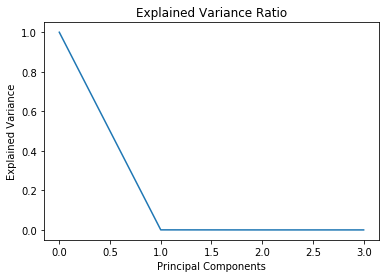

In [189]:
plt.plot(range(0, 4), pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio')
plt.show()

<font color='blue'>
** write-up **
    
> ** PCA :** It is a technique used for identify a smaller number of uncorrelated variables known as principal components from a larger set of data. Mostly used in data dimensionality reduction. It is very useful in fields such as image compression, face recognition and computer graphics. It is a non-parametric technique for extracting information from complex and large dimensional data sets

<img src="https://s3.amazonaws.com/aq-web-library/4.png" height="200" width="200">

Source: https://www.kdnuggets.com/2016/06/nutrition-principal-component-analysis-tutorial.html

### **2. Standard Scaler **

In [190]:
from sklearn.preprocessing import StandardScaler

In [191]:
scaler = StandardScaler()
scaler_data = scaler.fit_transform(data)

In [192]:
scaler_data = pd.DataFrame(scaler_data,columns = data.columns)
scaler_data.head()

,open,high,low,close,volume,transaction,vwap,ma_14,ema_14,momentum_14,rsi_14
0,1.783758,1.780228,1.774958,1.782940,0.995736,1.393305,1.779505,1.823362,1.808493,-0.814191,-1.601540
1,1.782532,1.803968,1.774569,1.811951,-0.186558,-0.027976,1.795969,1.819021,1.808701,-0.975620,-0.538161
2,1.811539,1.815658,1.813398,1.821102,-0.770137,-0.730688,1.813969,1.814591,1.810213,-0.996808,-0.143758
3,1.828211,1.820643,1.808005,1.802694,-0.507969,-0.414247,1.815665,1.809708,1.808832,-1.103755,-0.287006
4,1.816772,1.809192,1.808826,1.804160,-0.814957,-0.784900,1.807691,1.805990,1.807872,-0.828316,-0.287006


<font color='blue'>
** write-up **
    
> ** Standard Scaler :** Centering and scaling on each feature using two statistics of those feature - Mean and standard deviation. It is common requirement for many machine learning algorithms as it would be very helpful in optimization of output of algorithm

Standard Scaling steps
* It sets the mean of the data to 0, and the standard deviation to 1
* Subtracting the mean value from feature value, and divides by standard deviation
* The Scikit-learn sklearn.preprocessing.StandardScaler module is used for such an implementation
<img src="https://s3.amazonaws.com/aq-web-library/3.jpg" height="150" width="150">

<img src="https://s3.amazonaws.com/aq-web-library/2.png" height="300" width="600">
Source: https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/feature_scaling.html

### **3. One-Hot Encoding **

In [193]:
data_target_encoding = data[['close']].diff().dropna()
data_target_encoding['close'][data_target_encoding['close']<=0] = 0
data_target_encoding['close'][data_target_encoding['close'] > 0] = 1
data_target_encoding.head()

,close
15,1.0
16,1.0
17,0.0
18,1.0
19,0.0


In [194]:
data_variable_encoding = data[['vwap']].diff().dropna()
data_variable_encoding['vwap_hot_encode'] = 'decreased'
data_variable_encoding['vwap_hot_encode'][data_variable_encoding['vwap'] == 0] = 'no_change'
data_variable_encoding['vwap_hot_encode'][data_variable_encoding['vwap'] > 0] = 'increased'

pd.get_dummies(data_variable_encoding['vwap_hot_encode']).head()


,decreased,increased
15,0,1
16,0,1
17,0,1
18,1,0
19,1,0


<font color='blue'>
** write-up **
    
> ** One-Hot encoding :** When categorical variables have no ordinal relationship, as there was no natural ordering between categories one-hot encoding will help many machine learning algorithms as these algorithms cannot operate on label data directly. for example like in the above example "vwap_hot_encode" where values are labelled - decreased, no change, increased - converting them into numerical will help.

<img src="https://s3.amazonaws.com/aq-web-library/1.png" height="300" width="600">
Source: https://medium.com/@michaeldelsole/what-is-one-hot-encoding-and-how-to-do-it-f0ae272f1179


### **4. percentile rankings  **

In [197]:
data['volume'].rank(pct=True).head()

14    0.887379
15    0.558691
16    0.132531
17    0.350935
18    0.093317
Name: volume, dtype: float64

<font color='blue'>
** write-up **
    
> ** percentile rankings :** though less commonly used but very useful in financial data. It defines location of a feature values in a distribution.

<img src="https://s3.amazonaws.com/aq-web-library/5.png" height="200" width="400">
Source: https://owlcation.com/stem/What-is-Percentile-Rank-How-is-Percentile-Different-From-Percentage


## Cross-Validation Techniques

Cross-validation is a technique that allows us to make more efficient use of the data we have. 


<font color='blue'>
** write-up **
    
** 1. K-fold cross-validation **: 
> K-fold cross-validation splits the data into K equally sized blocks of data, illustrated in the figure below. Each block of data takes its turn as a validation data and k-1 bloks of data as training data. Averaging over the resulting K loss values gives us our final loss value. 

<img src="https://s3.amazonaws.com/aq-web-library/6.png" height="200" width="400">


source: https://en.wikipedia.org/wiki/Cross-validation_(statistics)


** 2. Purged K-FOLD Cross Validation **
> Important assumption for k-fold CV is sample is drawn from an IID process. But in financial data the observations cannot be assumed to be drawn from an IID process. So information leakes to test data as it contains some part information present in the training data. So solution to this is to purge from the training data
observations whose labels overlapped in time with those in the testing set hence reduces leakage. This process is called as Purged K-FOLD Cross Validation.


** 3. Walk forward analysis **: 
> Walk forward analysisis a method used in financeial trading for determining the best parameters to use in a trading strategy. The trading strategy is trained with in-sample data for a time window in a data series. A small portion of the out-of sample data adjacent to in-sample data is tested. The in-sample time window is shifted forward by the amount of shift which is covered by out-of-sample data whoch is been used for testing, and the process repeated. 

<img src="https://s3.amazonaws.com/aq-web-library/8.png" height="200" width="400">


source: https://www.backtestmarket.com/en/blog/post/what-is-walk-forward-analysis-and-which-are-the-good-practices-while-backtesting
